In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [7]:
def convert_to_gray(image_path):
    image = Image.open(image_path)
    gray_image = image.convert('L')
    gray_image.save('gray_image.jpg')

In [8]:

def cal_eigens(S):
    S_eigenvalues, S_eigenvectors = np.linalg.eig(S)
    indices_sorted = np.argsort(S_eigenvalues)[::-1]
    S_eigenvalues = S_eigenvalues[indices_sorted]
    S_eigenvectors = S_eigenvectors[indices_sorted]
    return S_eigenvalues, S_eigenvectors

In [9]:
def svd_approximation(image, error):
    #Convert image to matrix
    A = np.array(image, dtype=np.float64)
    S = A @ A.T
    
    #calculate eigenvalue
    eigenvalues, eigenvectors = cal_eigens(S)
    
    singular_values = np.sqrt(eigenvalues)
    
    #find suitable k-single with error<=10%
    total_energy = np.sum(singular_values)
    energy = 0.0
    k = 0
    for i in range(len(singular_values)):
        energy += singular_values[i]
        if energy / total_energy > (1 - error):
            k = i + 1
            break
    
    U = eigenvectors
    #Cal new_image
    rows, cols = A.shape
    new_image = np.zeros((rows, cols))
    for i in range(k):
        U_new = U[:,i].reshape(rows,1)
        new_image += U_new @ U_new.T @ A # sigma_i * U_i * v_i^T but v_i^T = (U_i^T * A)/sigma_i => U_i* U_i^T * A
    print(f"k = {k}")
    return new_image  , energy/total_energy

k = 187
 error = 19.97%


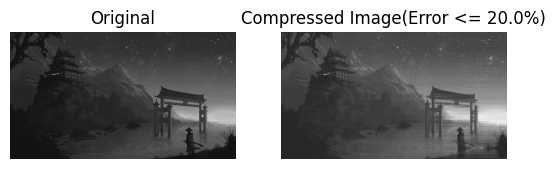

In [16]:
convert_to_gray(r'C:\Users\sangw\SVD\mountain.jpg')
image = plt.imread('gray_image.jpg')  # Load the image
error = 0.2
approximation, energy = svd_approximation(image, error)
print(f" error = {1 - energy:.2%}")
#save image
compressed_image_uint8 = np.uint8(approximation)
compressed_image_obj = Image.fromarray(compressed_image_uint8)
compressed_image_obj.save('compressed_image_1.jpg')

#image before
plt.subplot(1, 2, 1)
plt.imshow(image,cmap='gray')
plt.title('Original')
plt.axis('off')

#image after
plt.subplot(1, 2, 2)
plt.imshow(approximation, cmap='gray')
plt.title(f'Compressed Image(Error <= {error*100}%)')
plt.axis('off')
plt.show()